In [1]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
 # Loading data
file_path = Path("Resources/housing_data.csv")
df_housing = pd.read_csv(file_path)
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Define features set
X = df_housing.copy()
X.drop(["price", "date", "id", "condition", "grade","lat", "long", "sqft_living15", "sqft_lot15"], axis=1, inplace=True)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2,1.00,1180,5650,1.0,0,0,1180,0,1955,0,98178
1,3,2.25,2570,7242,2.0,0,0,2170,400,1951,1991,98125
2,2,1.00,770,10000,1.0,0,0,770,0,1933,0,98028
3,4,3.00,1960,5000,1.0,0,0,1050,910,1965,0,98136
4,3,2.00,1680,8080,1.0,0,0,1680,0,1987,0,98074


In [4]:
print(X.dtypes)

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
dtype: object


In [16]:
# We can sort the features by their importance
importances = model.feature_importances_
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5639706340717785, 'sqft_living'),
 (0.1529469118502252, 'zipcode'),
 (0.06504614620828417, 'yr_built'),
 (0.04698343226276476, 'sqft_lot'),
 (0.034555902226778276, 'view'),
 (0.03334182596585831, 'sqft_above'),
 (0.032547881613468665, 'waterfront'),
 (0.0269782914412466, 'bathrooms'),
 (0.017191438991653825, 'bedrooms'),
 (0.011515274926571634, 'sqft_basement'),
 (0.008345069422745616, 'floors'),
 (0.006577191018624381, 'yr_renovated')]

In [5]:
# Define target vector
y = df_housing["price"].values.reshape(-1, 1)
y[:5]

array([[231300],
       [538000],
       [180000],
       [604000],
       [510000]], dtype=int64)

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Creating the decision tree regressor instance
model = tree.DecisionTreeRegressor()

In [11]:
# Fitting the model
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [12]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [13]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)


In [14]:
# Print Scores
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 124881.78340118431
Mean Squared Error: 52465684750.08128
Root Mean Squared Error: 229053.89049322275
R-squared: 0.6182646084525831


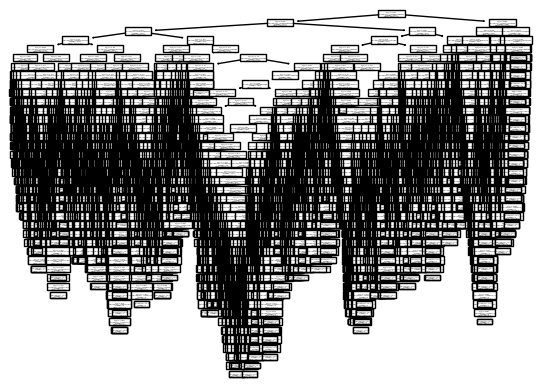

In [17]:
# Plot Decision Tree
tree.plot_tree(model)
plt.show()